In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "C:/Users/navee/OneDrive/Desktop/Python/diabetes.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


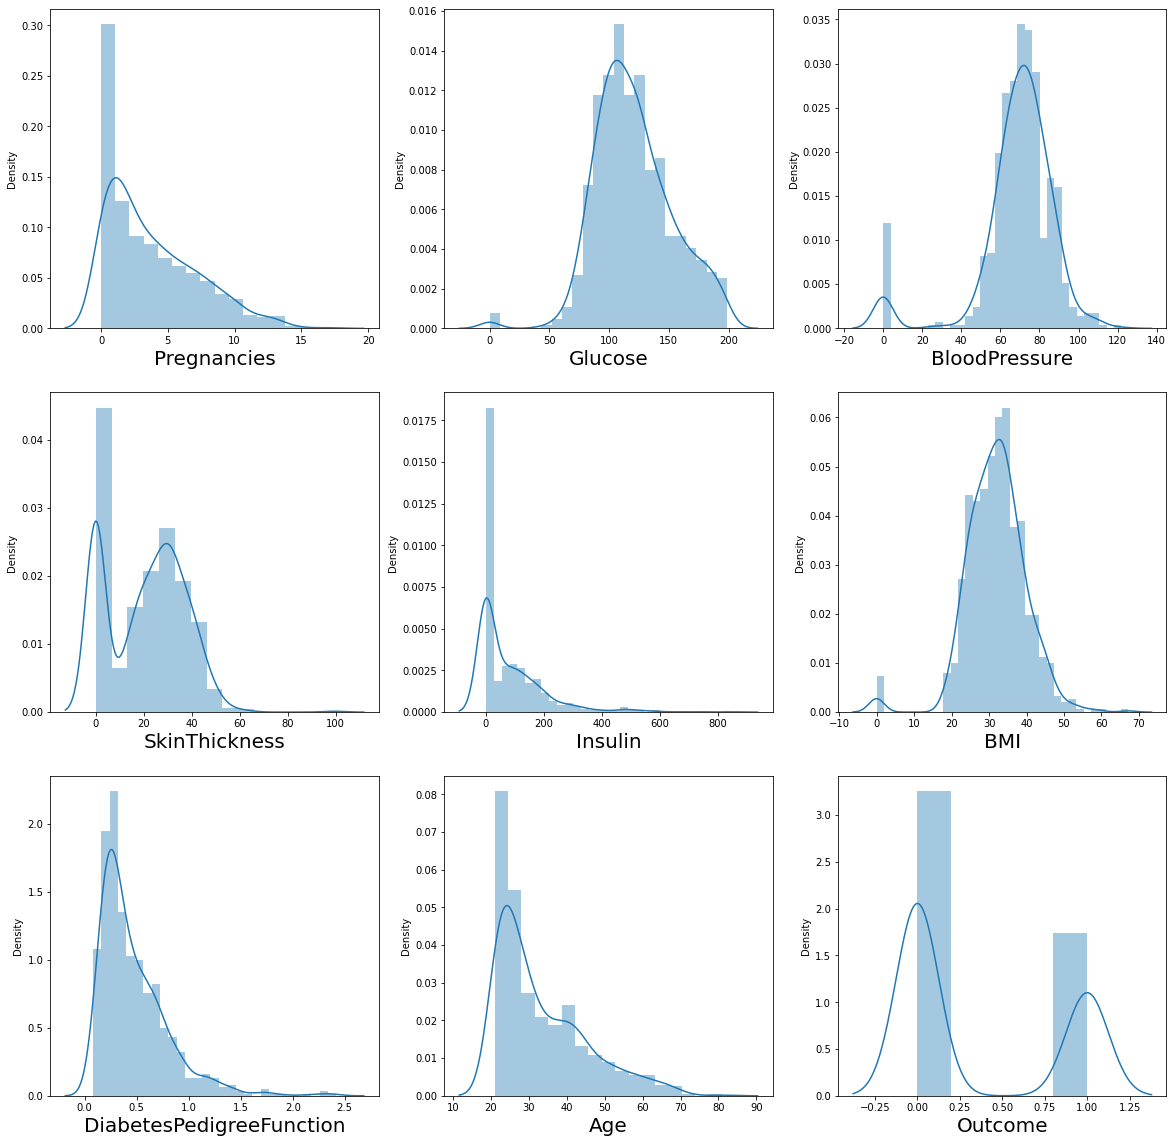

In [6]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot (3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [7]:
data['BMI'] = data ['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure'] = data ['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose'] = data ['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin'] = data ['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness'] = data ['SkinThickness'].replace(0,data['SkinThickness'].mean())

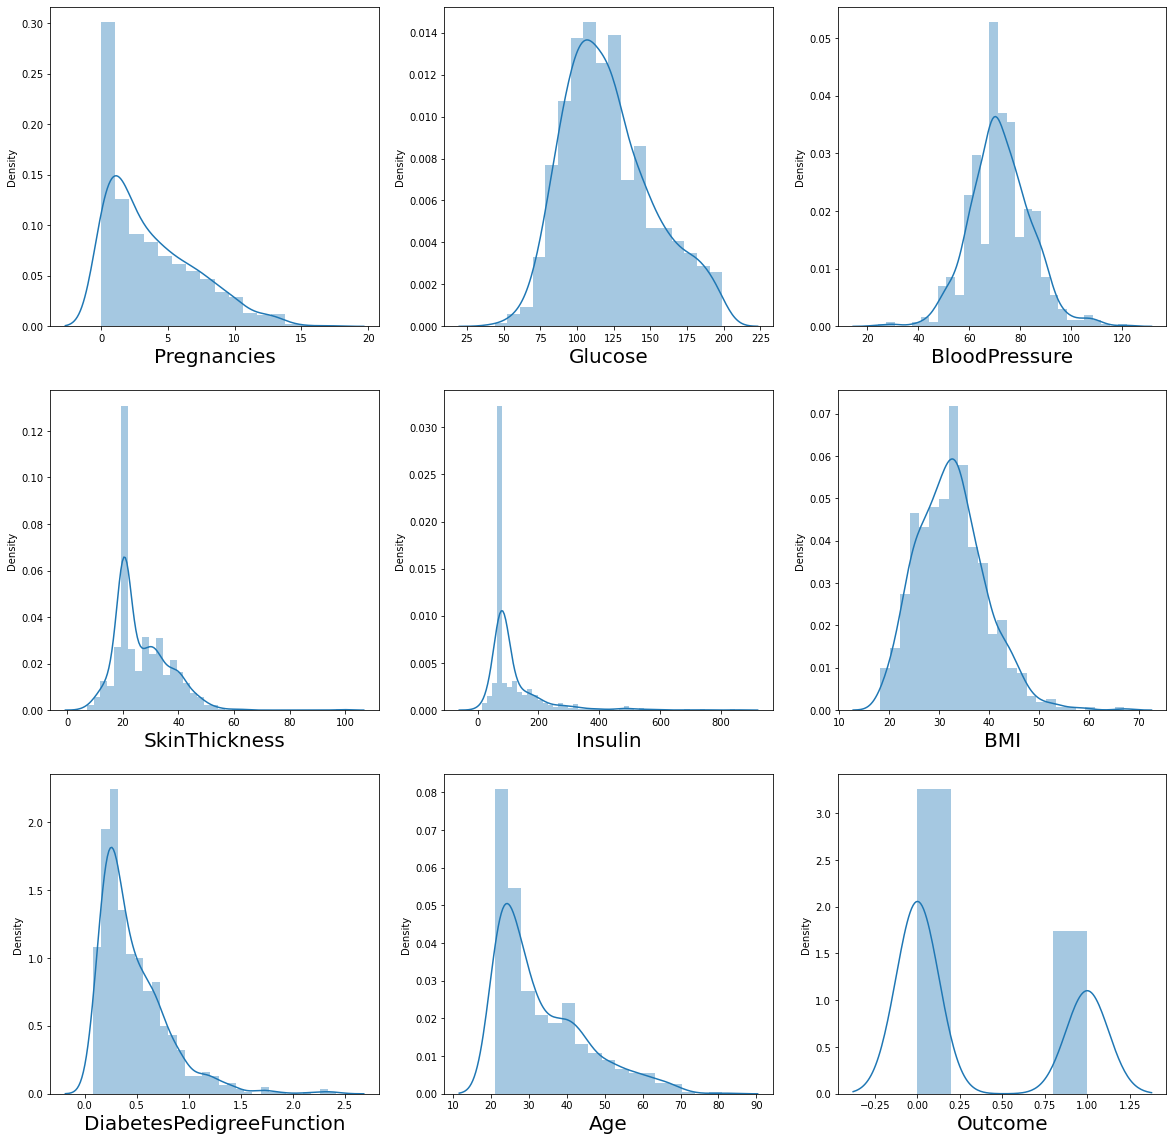

In [8]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot (3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [9]:
df_features = data.drop('Outcome',axis=1) 

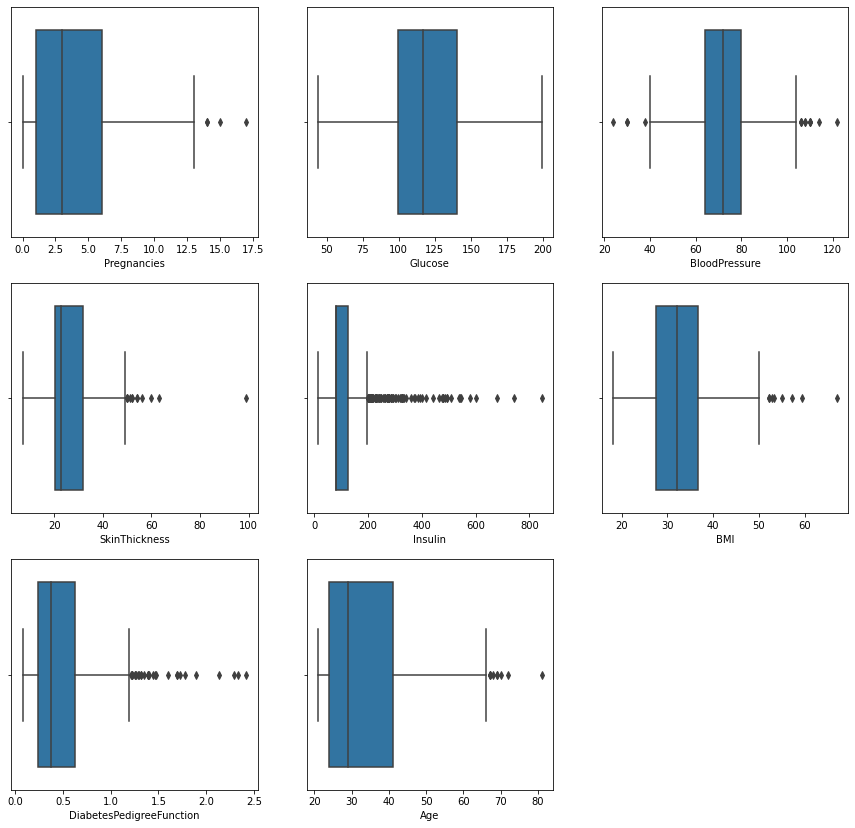

In [10]:
plt.figure(figsize=(15,50))
graph=1

for column in df_features:
    if graph<=30:
        ax = plt.subplot (10,3,graph)
        sns.boxplot(df_features[column],orient ='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [11]:
data.shape

(768, 9)

In [12]:
## Find the IQR ( inter quantile range) to identify outliers

#1st quantile
q1 = data.quantile(0.25)


#3rd quantile

q3 = data.quantile(0.75)


#Find IQR

iqr = q3-q1

# Outlier detection
higher side =  q3 + (1.5 * iqr)

lower side = q1 - (1.5 * iqr)  

In [13]:
preg_high = (q3.Pregnancies+(1.5*iqr.Pregnancies))
preg_high

13.5

In [14]:
index = np.where(data['Pregnancies']>preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [15]:
data = data.drop (data.index[index])
data.shape

(764, 9)

In [16]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
bp_high = (q3.BloodPressure+(1.5*iqr.BloodPressure))
print(bp_high)
index = np.where(data['BloodPressure']>bp_high)

data = data.drop(data.index[index])
print(data.shape)
data.reset_index()



104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
st_high = (q3.SkinThickness+(1.5*iqr.SkinThickness))
print(st_high)
index = np.where(data['SkinThickness']>st_high)

data = data.drop(data.index[index])
print(data.shape)
data.reset_index()



49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
index

(array([ 56,  84,  96, 116, 146, 205, 267, 269, 437, 523, 569, 581],
       dtype=int64),)

In [20]:
insu_high = (q3.Insulin+(1.5*iqr.Insulin ))
print(insu_high)
index = np.where(data['Insulin']>insu_high)

data = data.drop(data.index[index])
print(data.shape)
data.reset_index()



198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
bmi_high = (q3.BMI+(1.5*iqr.BMI))
print(bp_high)
index = np.where(data['BMI']>bmi_high)

data = data.drop(data.index[index])
print(data.shape)
data.reset_index()



104.0
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
dpf_high = (q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction))
print(bp_high)
index = np.where(data['DiabetesPedigreeFunction']>dpf_high)

data = data.drop(data.index[index])
print(data.shape)
data.reset_index()



104.0
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
age_high = (q3.Age+(1.5*iqr.Age))
print(bp_high)
index = np.where(data['Age']>dpf_high)

data = data.drop(data.index[index])
print(data.shape)
data.reset_index()



104.0
(0, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


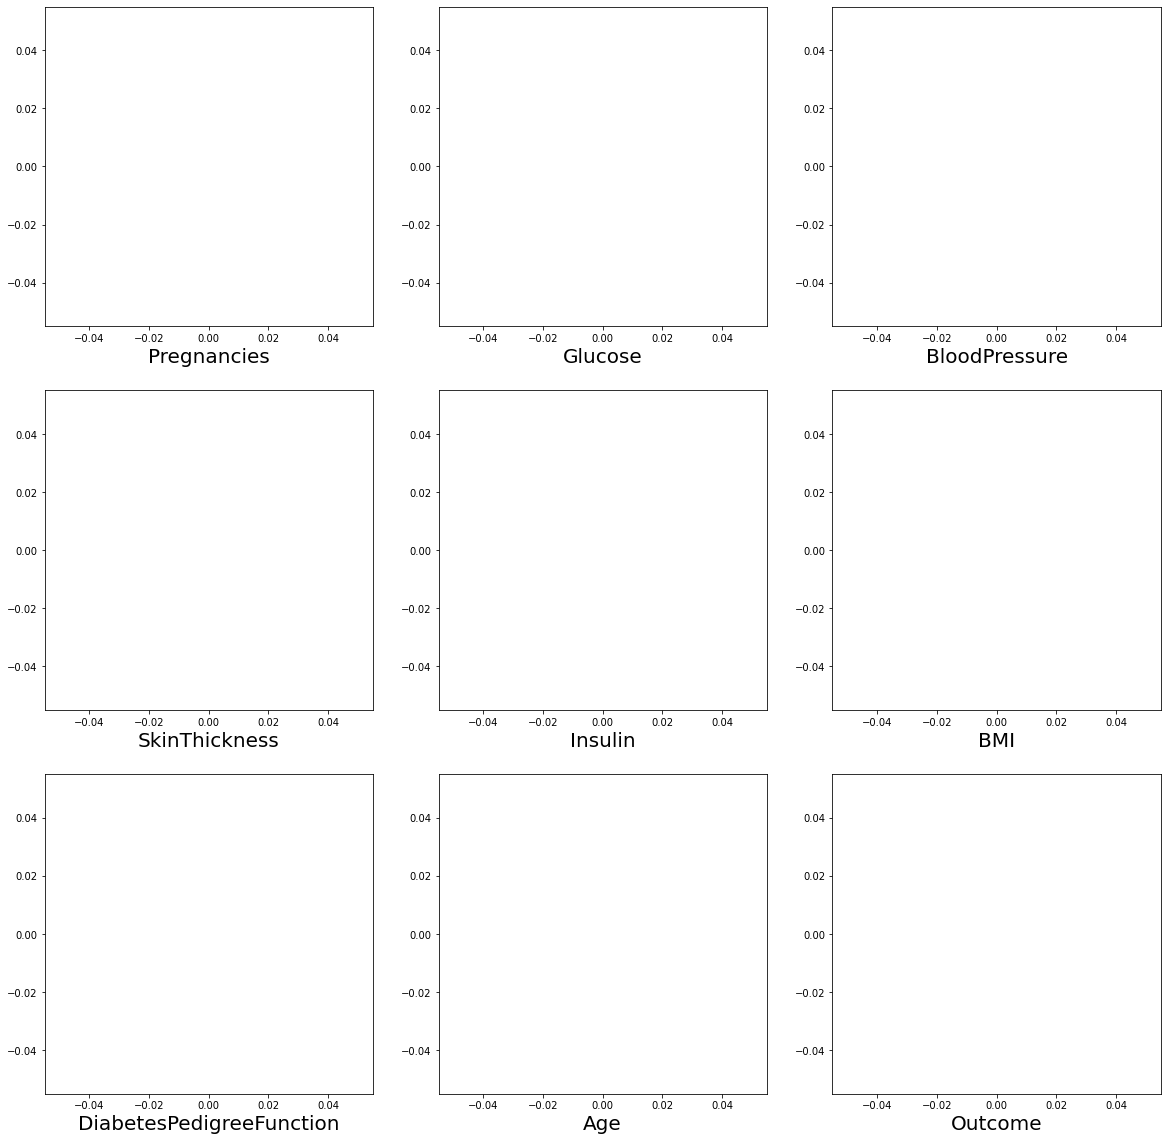

In [24]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot (3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [25]:
x= data.drop(columns=['Outcome'])
y=data['Outcome']

ValueError: min() arg is an empty sequence

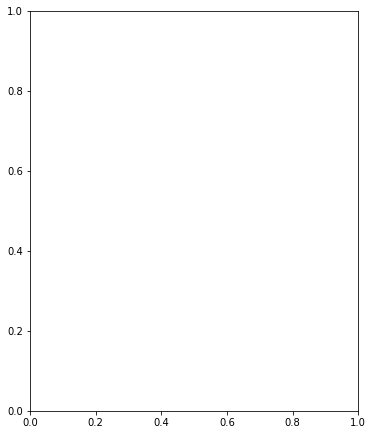

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot (3,3,plotnumber)
        sns.stripplot(y,x[column])
    
    plotnumber+=1
plt.tight_layout()

In [27]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required by StandardScaler.

In [ ]:
x_scaled.shape[1]

In [ ]:
##Finding variance inflation factor in each scaled column ie.x_scaled.shape[1](1/1-R2)

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Feactures"]=x.columns
vif

In [ ]:
x_train,x_test, y_train,y_test =  train_test_split(x_scaled,y,test_size=0.25, random_state=355)


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

In [ ]:
import pickle
with open ('modelForPrediction.sav','wb') as f:
    pickle.dump(log_reg,f)
with open('sandardscalar.sav','wb') as f:
    pickle.dump(scalar,f)

In [ ]:
y_pred=log_reg.predict(x_test)

In [ ]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

In [ ]:
##Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
accuracy = (true_positive+true_negative)  / (true_positive + false_positive + false_negative+true_negative)
accuracy

In [ ]:
precision = true_positive/(true_positive+false_positive)
precision

In [ ]:
recall = true_positive/(true_positive+false_negative)
recall

In [ ]:
F1_score = 2*(recall * precision) / (recall+precision)
F1_score

In [ ]:
auc = roc_auc_score(y_test,y_pred)
auc

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot(fpr,tpr,color = 'orange',label='Roc')
plt.plot([0,1],[0,1],color='darkred',linestyle='--',label='Roc curve(area=%0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic(ROC)Curve')
plt.legend()
plt.show()